<a href="https://colab.research.google.com/github/Sivasruthy24/AIML-Project/blob/main/ML_project_Fake_Real_news_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload Fake.csv and True.csv manually
uploaded = files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [ ]:
# Install (only if needed)
!pip install pandas scikit-learn matplotlib seaborn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load datasets
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Add labels
fake["label"] = 0
true["label"] = 1

# Combine and shuffle
data = pd.concat([fake, true], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# View sample
data[["title", "label"]].head()


,title,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,0
1,Trump drops Steve Bannon from National Securit...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,0
4,Donald Trump heads for Scotland to reopen a go...,1


In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

data['text'] = data['title'].apply(clean_text)


In [ ]:
# Features and labels
X = data['text']
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)


RandomForestClassifier()

Accuracy: 0.9370824053452116

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4710
           1       0.94      0.93      0.93      4270

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



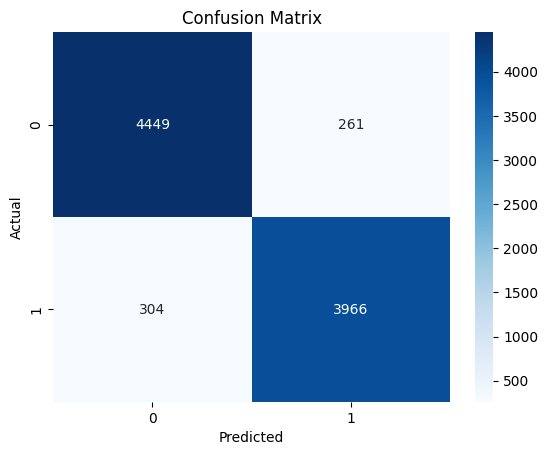

In [ ]:
# Predictions
y_pred = model.predict(X_test_tfidf)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


In [ ]:
from google.colab import files
files.download("confusion_matrix.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Custom input function to predict news
def predict_news():
    # Taking input from the user
    user_input = input("Enter a news headline to check if it's fake or real: ")

    # Preprocess the input text
    text_cleaned = clean_text(user_input)

    # Convert the text to TF-IDF
    text_tfidf = vectorizer.transform([text_cleaned])

    # Make prediction
    prediction = model.predict(text_tfidf)

    # Output result
    if prediction[0] == 1:
        print("This is Real News!")
    else:
        print("This is Fake News!")

predict_news()

Enter a news headline to check if it's fake or real: Trump to continue Biden's court defense of abortion drug mifepristone
This is Real News!
